In [1]:
# keras mnist
import keras
from keras.datasets import mnist
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.utils import to_categorical
import numpy as np

# prepare testing and training data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = (x_train.reshape(-1, 28,28, 1)/256)
x_test = (x_test.reshape(-1, 28,28, 1)/256)

# print the shape to input into 1st Sequential layer
print(x_train.shape)

Using TensorFlow backend.


(60000, 28, 28, 1)


In [2]:
# One Hot encoding
y_train_OH = to_categorical(y_train)
y_test_OH = to_categorical(y_test)

# setup Neural Network
# 2x (2D Convolutional layer, Pooling)
# 2x Dense Layers, output shapes defined

model = Sequential([
    Conv2D(32, (3,3), input_shape=(28, 28, 1)),
    Activation('relu'),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(32, (3,3)),
    Activation('relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(10),
    Activation('softmax'),
])

model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [3]:
# train for 10 epochs:

model.fit(x_train, y_train_OH, batch_size=64, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 41s 684us/step - loss: 0.2464 - accuracy: 0.9288
Epoch 2/10
60000/60000 [==============================] - 40s 661us/step - loss: 0.0726 - accuracy: 0.9779
Epoch 3/10
60000/60000 [==============================] - 40s 668us/step - loss: 0.0522 - accuracy: 0.9839
Epoch 4/10
60000/60000 [==============================] - 39s 654us/step - loss: 0.0428 - accuracy: 0.9870
Epoch 5/10
60000/60000 [==============================] - 40s 664us/step - loss: 0.0355 - accuracy: 0.9887
Epoch 6/10
60000/60000 [==============================] - 40s 667us/step - loss: 0.0295 - accuracy: 0.9912
Epoch 7/10
60000/60000 [==============================] - 40s 666us/step - loss: 0.0264 - accuracy: 0.9917
Epoch 8/10
60000/60000 [==============================] - 41s 691us/step - loss: 0.0222 - accuracy: 0.9929
Epoch 9/10
60000/60000 [==============================] - 39s 657us/step - loss: 0.0198 - accuracy: 0.9935
Epoch 10/10
60000/60000 [============

In [4]:
#Test loss 0.04436133767672945
#Test accuracy 0.9866999983787537
# evaluate loss & accuracy:
loss, accuracy = model.evaluate(x_test, y_test_OH)
print('Test loss', loss)
print('Test accuracy', accuracy)

predictions = model.predict(x_test)

10000/10000 [==============================] - 3s 260us/step
Test loss 0.03260210736241279
Test accuracy 0.9886000156402588


Prediction: 7


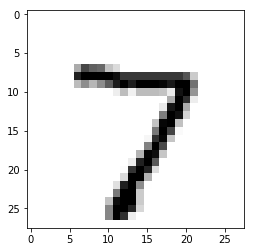

Prediction: 2


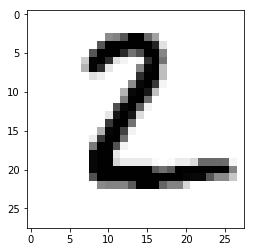

Prediction: 1


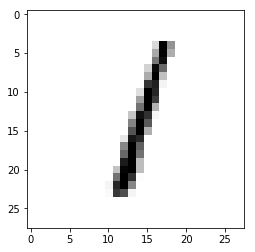

Prediction: 0


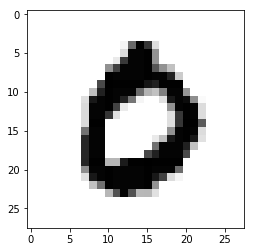

Prediction: 4


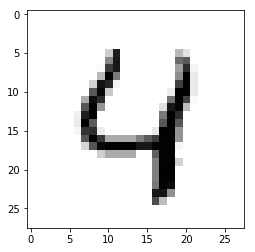

Prediction: 1


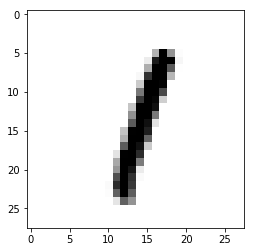

Prediction: 4


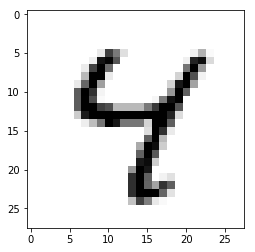

Prediction: 9


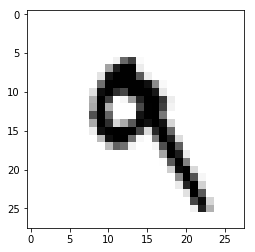

Prediction: 5


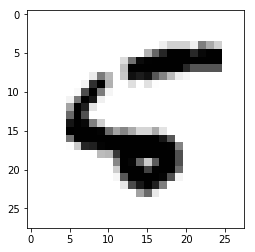

Prediction: 9


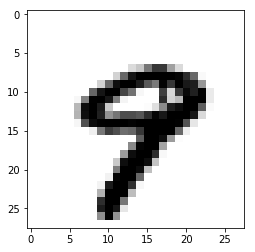

In [6]:
# test predicitons:
import matplotlib.pyplot as plt

for i in range (0,10):
    print('Prediction:', np.argmax(np.round(predictions[i])))
    plt.imshow(x_test[i].reshape(28, 28), cmap = plt.cm.binary)
    plt.show()